In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

Linear Regression model based on above model 

In [2]:
regr = linear_model.LinearRegression()
Y = music['loudness'].values.reshape(-1, 1)
X = music[['duration', 'bpm']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.01512554 -0.41310123]]

Intercept: 
 [62.1762007]

R-squared:
0.31494345659427203


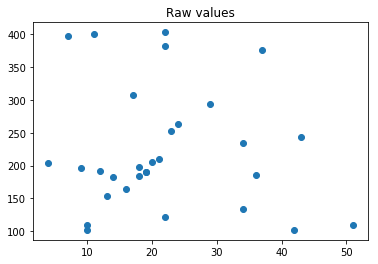

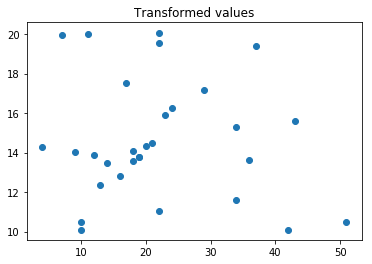

In [3]:
# Sample music data.
outcome = music['loudness']
feature = music['duration']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

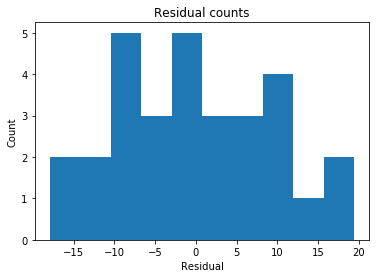

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = music['loudness']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

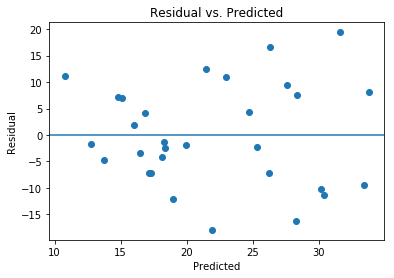

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [6]:

correlation_matrix = X.corr()
display(correlation_matrix)

,duration,bpm
duration,1.000000,-0.033007
bpm,-0.033007,1.000000


KNN Regression Model 

In [7]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [8]:

x_loudness = np.expand_dims(music.loudness, axis=1)
x_bpm = np.expand_dims(music.bpm, axis=1)
X = music[['loudness', 'bpm']]
Y= np.expand_dims(music.duration, axis=1)
print(Y.shape)

(30, 1)


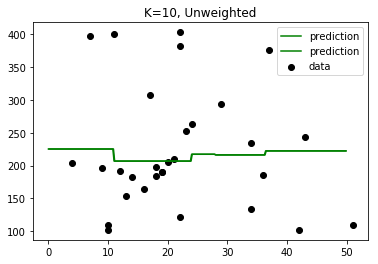

In [9]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'bpm']]
Y = music['duration']
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]
T = T.reshape(250,2)
# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(music['loudness'],Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

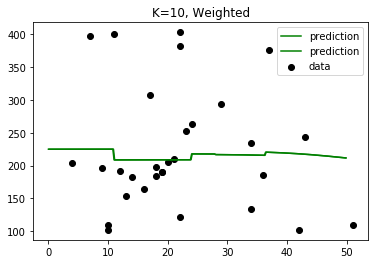

In [12]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X1 = music[['loudness', 'bpm']]
Y1 = music['duration']
knn_w.fit(X1, Y1)

# Set up our prediction line.
T1 = np.arange(0, 50, 0.1)[:, np.newaxis]
T1 = T.reshape(250,2)
Y1_ = knn_w.predict(T)

#plt.scatter(X1, Y1, c='k', label='data')
plt.scatter(music['loudness'],Y, c='k', label='data')
plt.plot(T1, Y1_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X1, Y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

print(score)
print(score_w)

Unweighted Accuracy: -0.70 (+/- 2.44)
Weighted Accuracy: -0.49 (+/- 1.63)
[-3.1350878  -0.15349602  0.04990306 -0.1674089  -0.10475577]
[-1.93036357 -0.2741111  -0.03087509  0.47984955 -0.67809667]


In this particular circumstance I would choose the KNN regression model as the prediction of the loudness to duration seems to fall more inline with the outcome. The weighted accruacy is below the R2 squared value indicating a good set but not enough datapoints. Which makes the weighted accuracy of 49% as oppose to The Linear regression method which is only 30% percent. In the linear regression The histogram is pretty consistant so I would say that the numbers should be pretty accurate which means that the predicting in the OLS model is probably not the best fit.    